In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from skimage.io import imread
from time import time
from skimage.segmentation import felzenszwalb, mark_boundaries

In [10]:
n_colors = 4

china = imread("modelo.jpg")
china = np.array(china, dtype=np.float64) / 255.0


w, h, d = original_shape = tuple(china.shape)

image_array = np.reshape(china, (w * h, d))

image_array_sample = shuffle(image_array)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)


labels = kmeans.predict(image_array)


def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [11]:
predict_image = recreate_image(kmeans.cluster_centers_, labels, w, h)

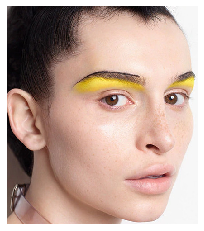

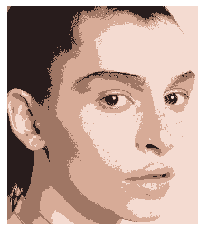

In [12]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.imshow(predict_image)

In [5]:
np.unique(predict_image)

array([0.08855993, 0.09133879, 0.12416569, 0.31467865, 0.37382898,
       0.5129902 , 0.53438635, 0.63113048, 0.80065874, 0.80113774,
       0.84380629, 0.9506047 ])

In [8]:
segments = slic(image, 
                n_segments=numSegments, 
                sigma=5)

NameError: name 'slic' is not defined

/home/mpgxc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


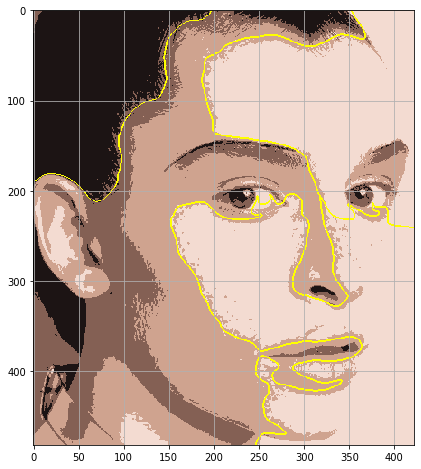

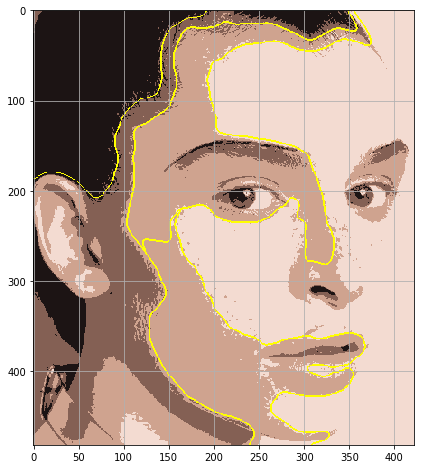

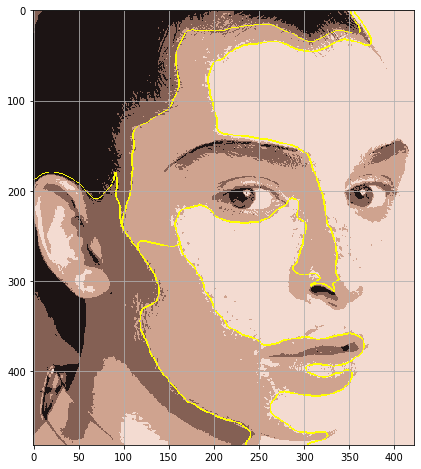

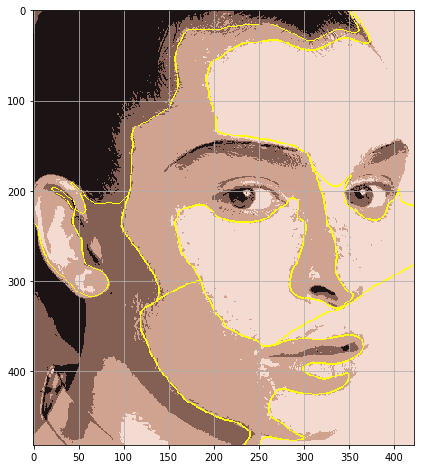

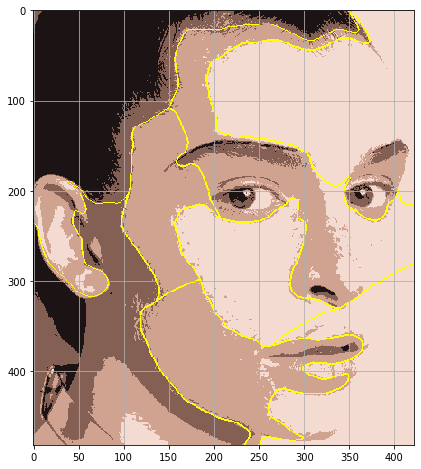

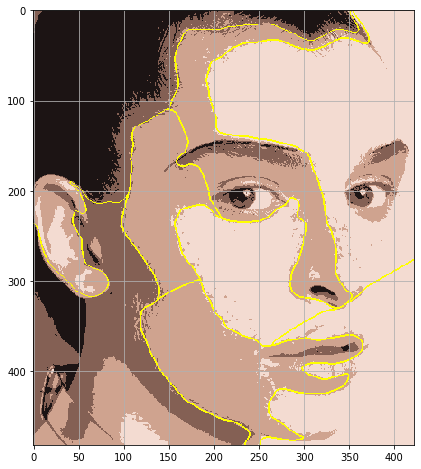

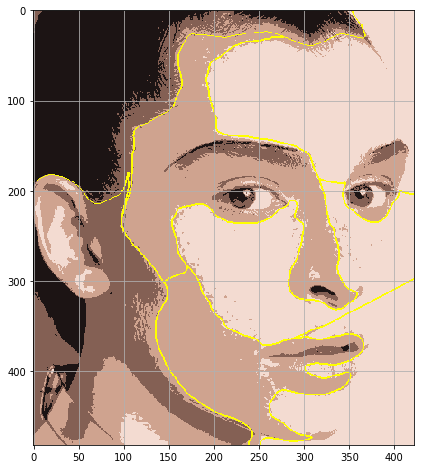

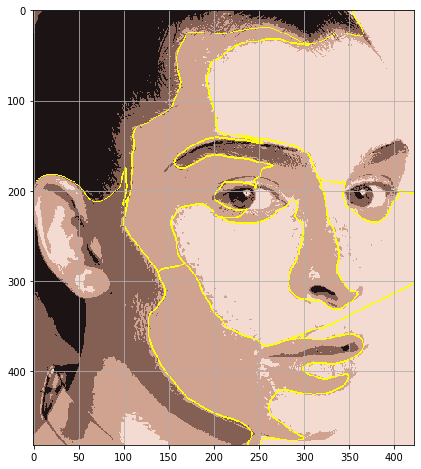

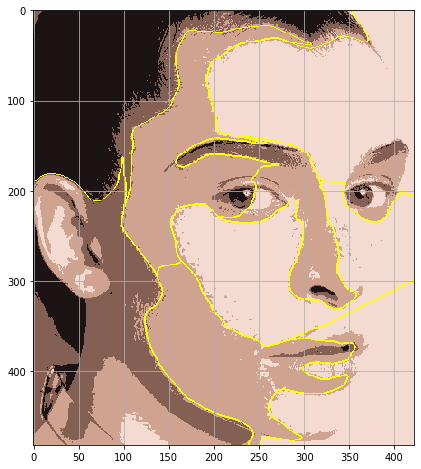

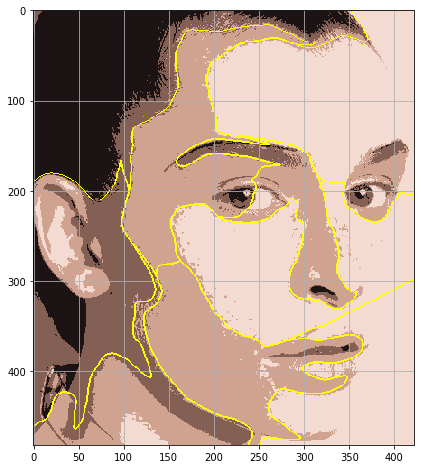

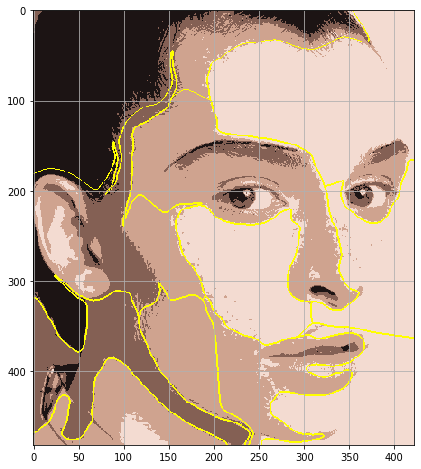

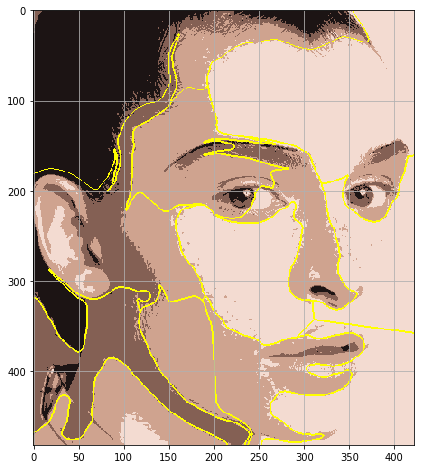

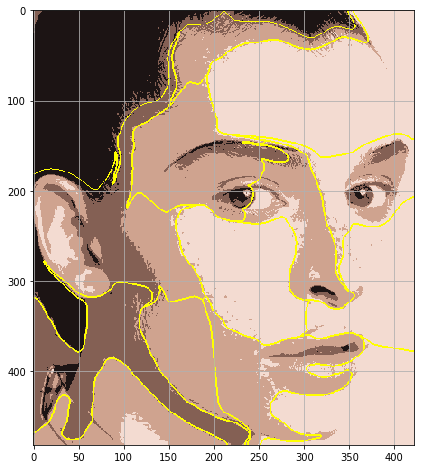

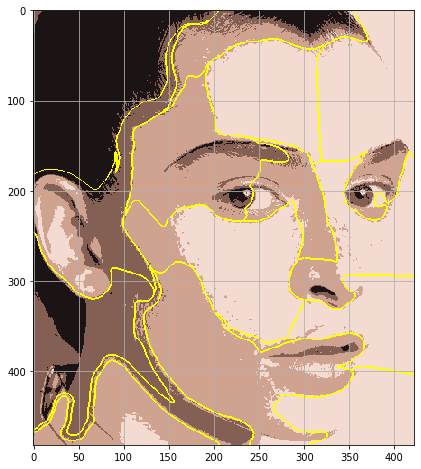

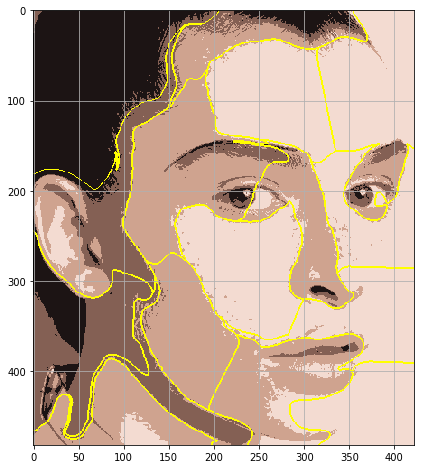

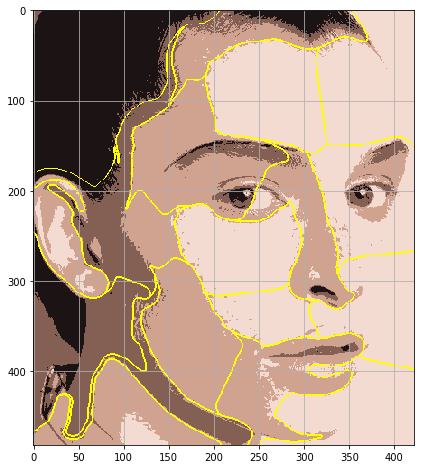

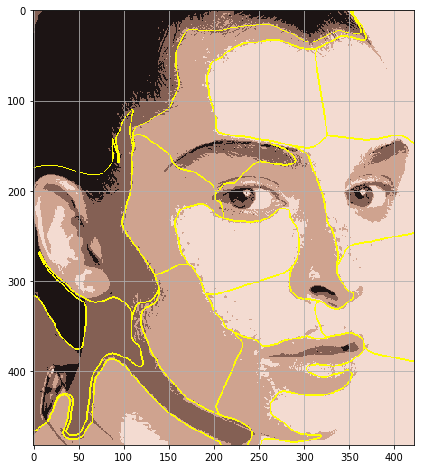

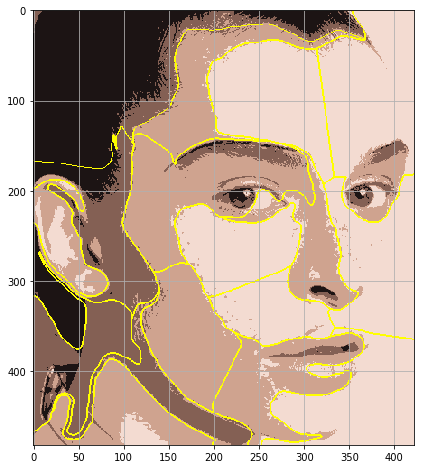

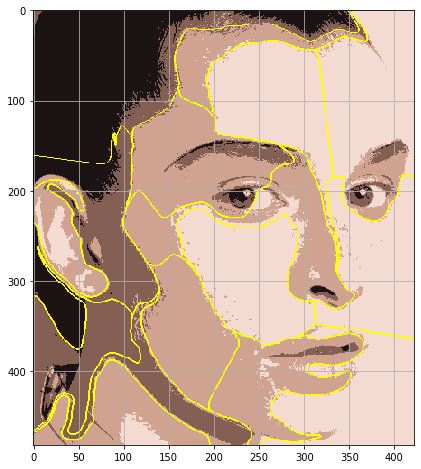

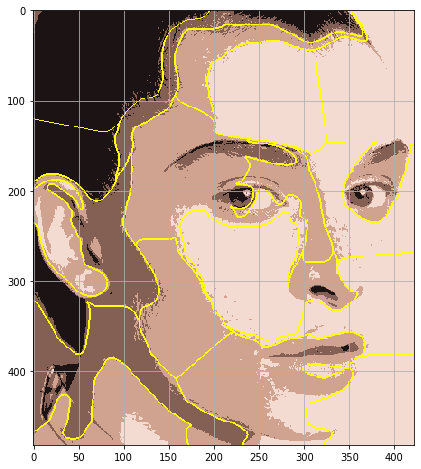

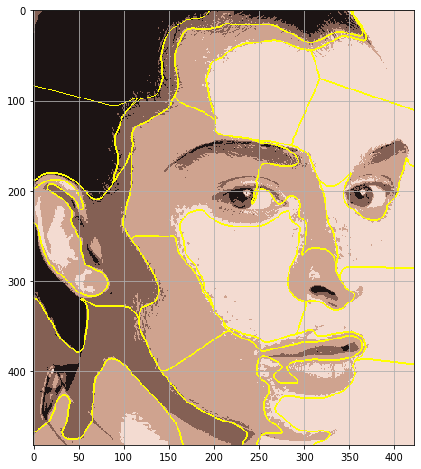

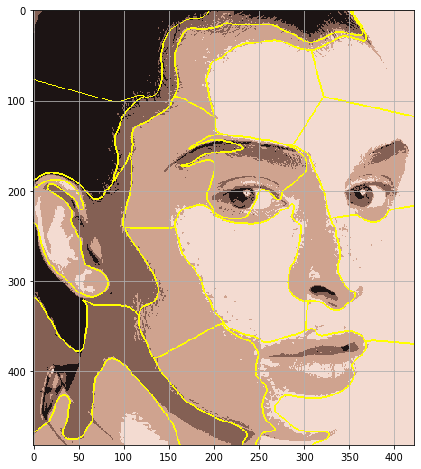

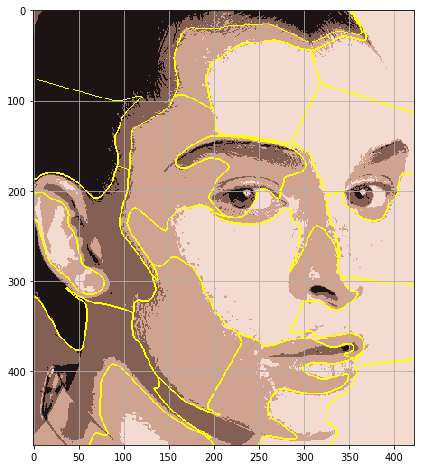

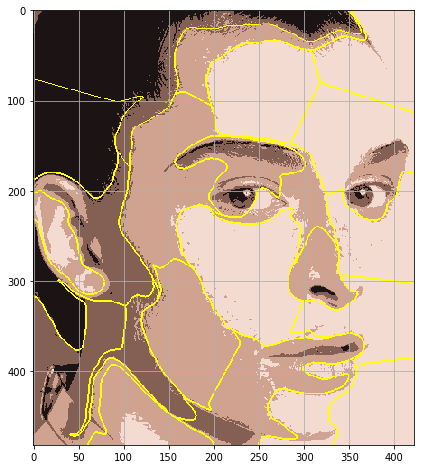

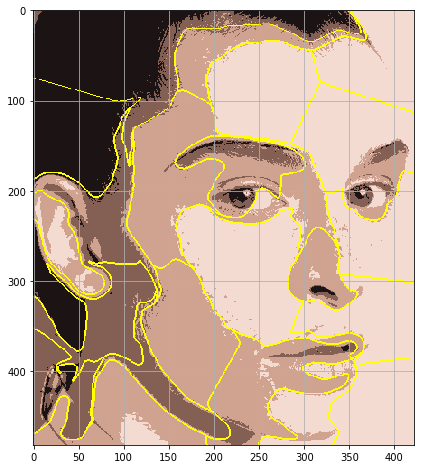

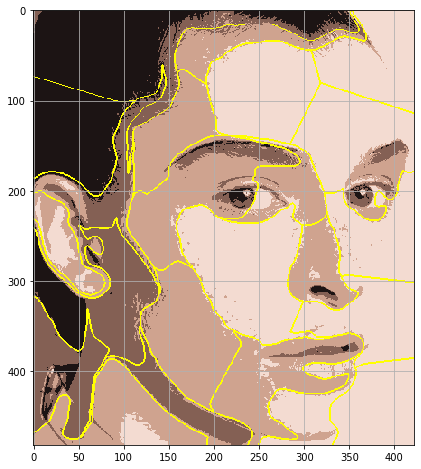

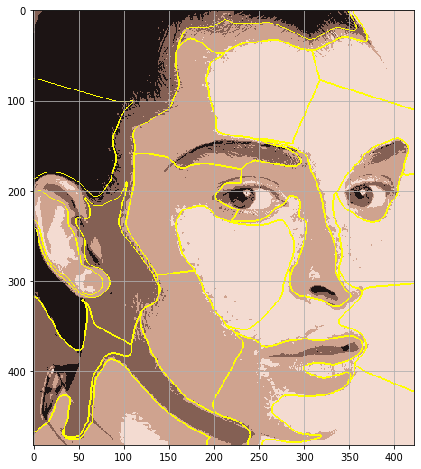

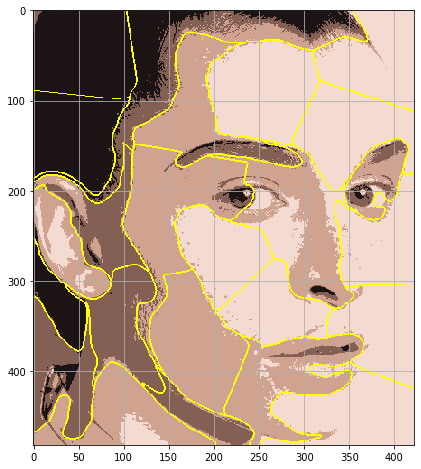

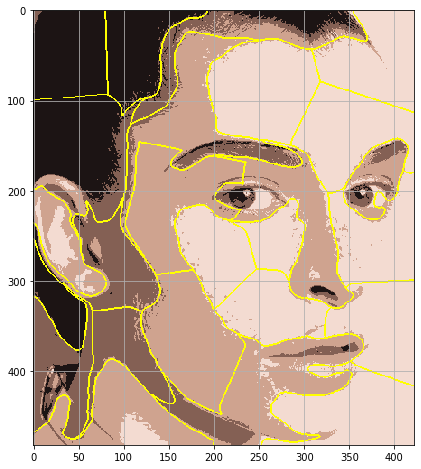

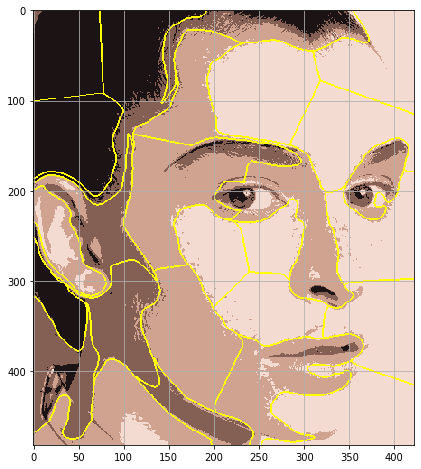

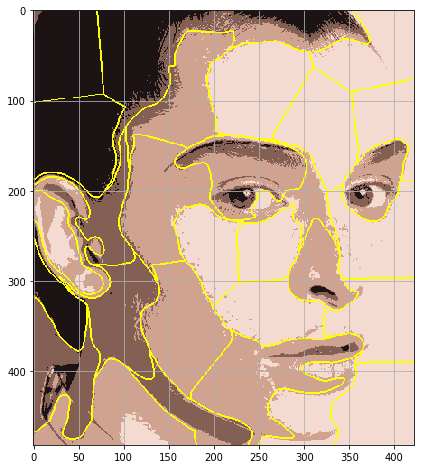

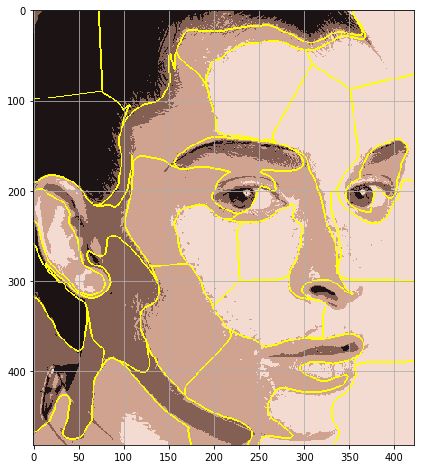

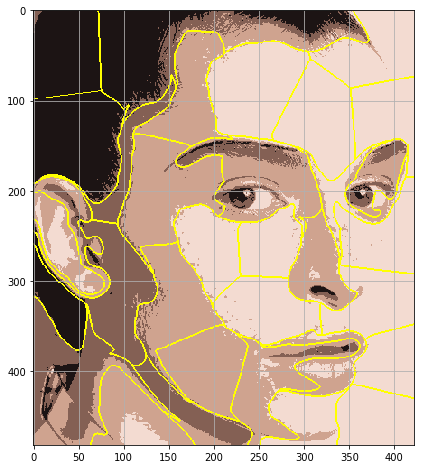

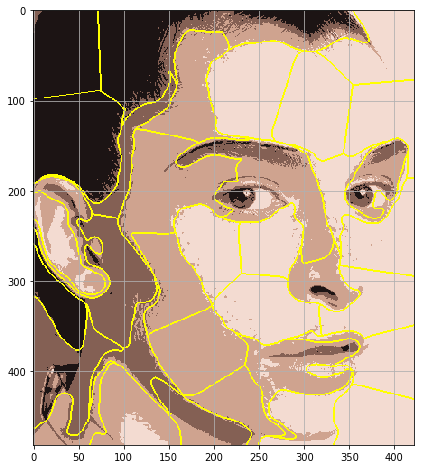

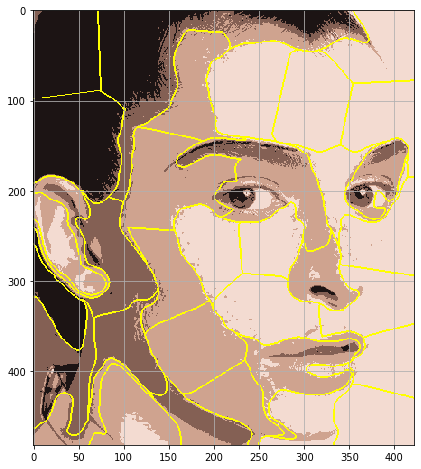

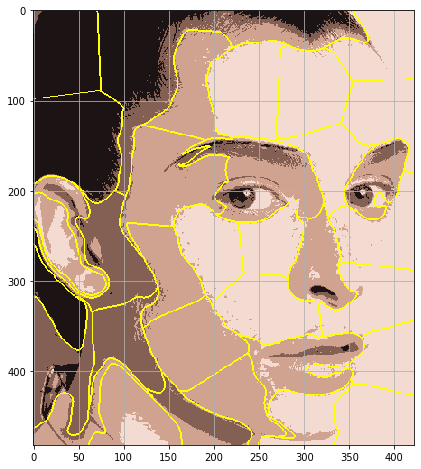

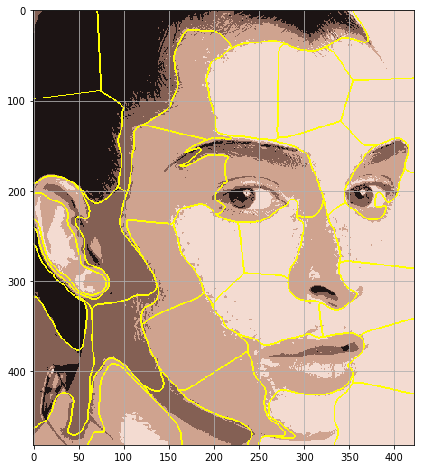

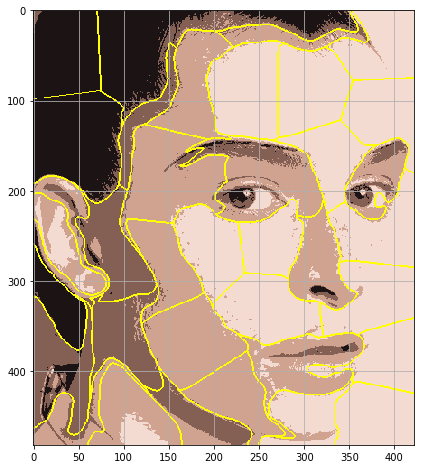

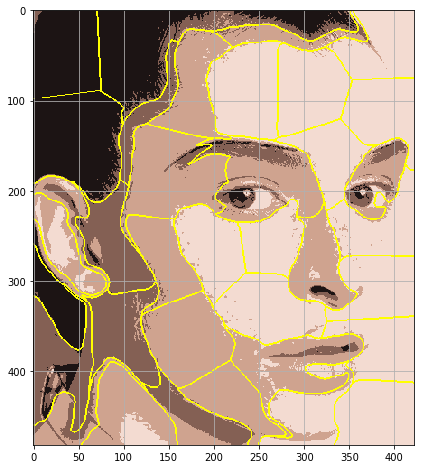

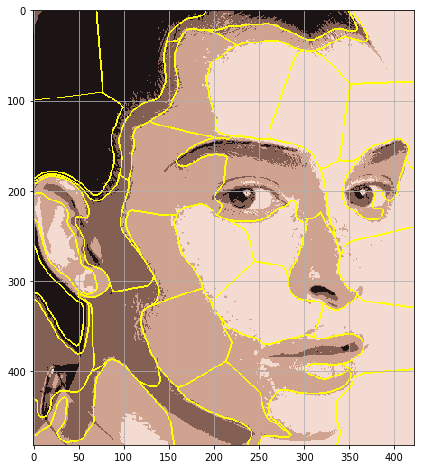

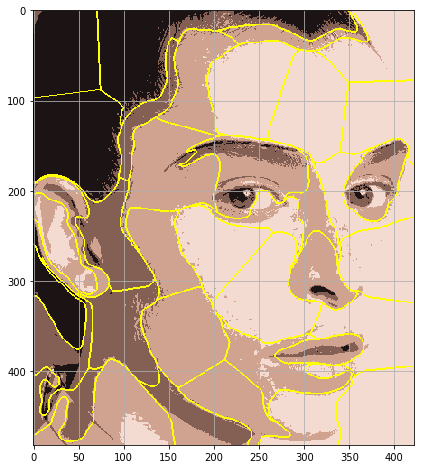

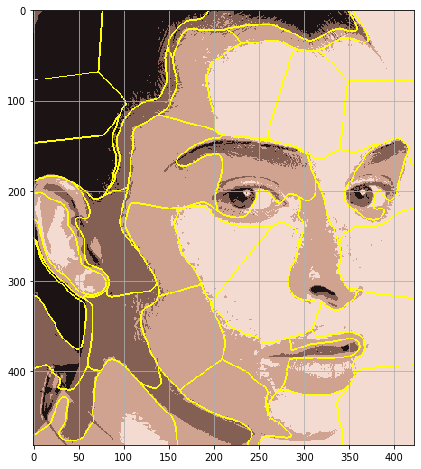

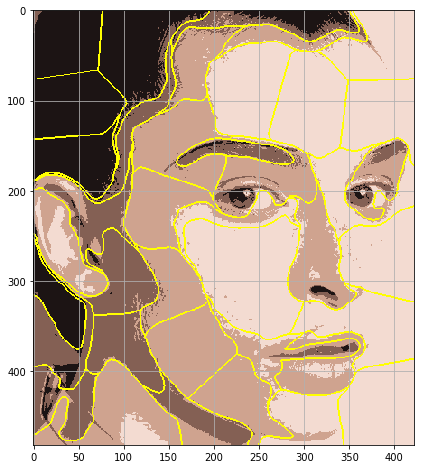

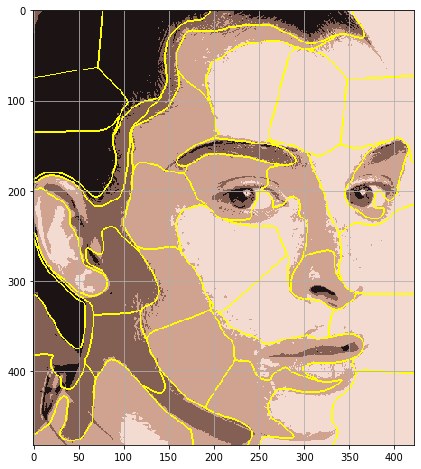

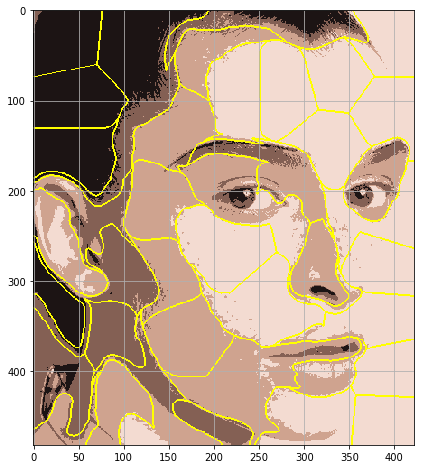

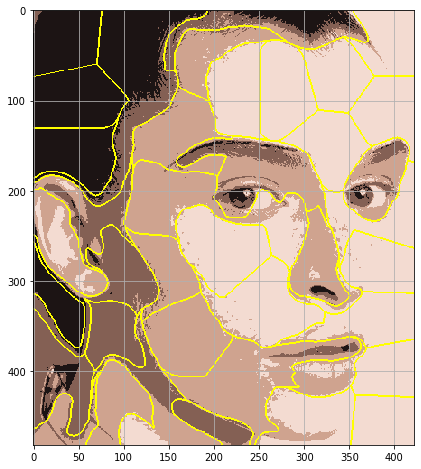

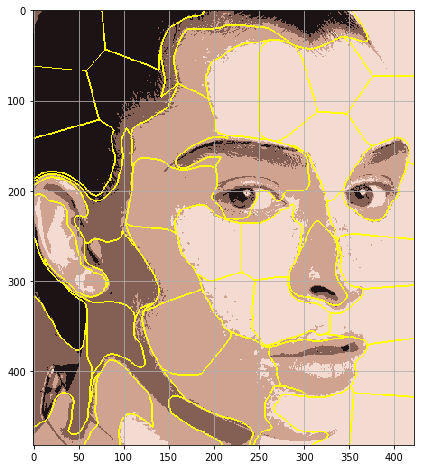

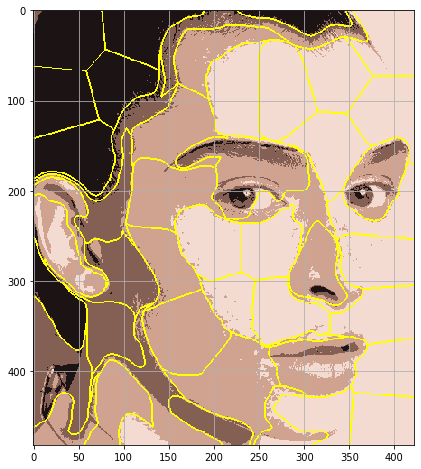

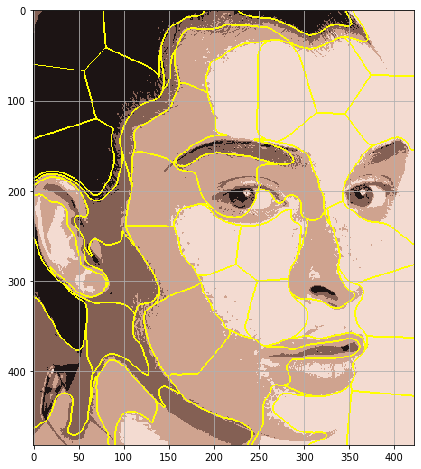

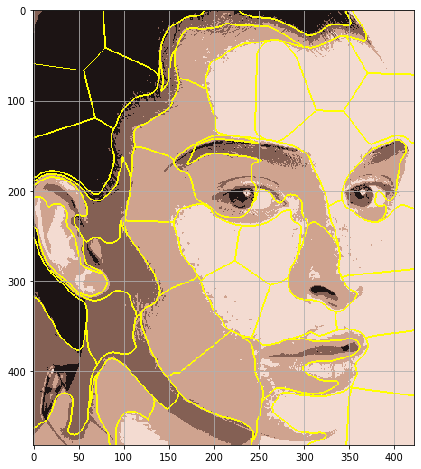

In [38]:
image = predict_image

for numSegments in ([x + 5 for x in range(50)]):
    
    segments = slic(image, 
                    n_segments=numSegments, 
                    sigma=5)

    fig = plt.figure(figsize = (15, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.axis("on")
    plt.grid()
    
plt.show()